In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DATA_frame.csv to DATA_frame.csv


In [ ]:
df = pd.read_csv("DATA_frame.csv", sep=";", encoding="utf-8")
df = df.drop(columns='Unnamed: 23')
df = df.replace(',', '.', regex=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.head(180)

,No trafo,Tensión interfacial,Número ácido,Rigidez dieléctrica,Contenido de Humedad,Color,Furanos,Grado de Polimerización,Estimado de vida Remante,Indice de Calidad,...,Metano,Monoxido de Carbono,Etileno,Etano,Acetileno,Total Gases Combustibles,Dioxido Carbono,Oxigeno,Nitrogeno,Relacion O2/N2
0,1.0,42.5,0.0204,50.0,8.0,2.0,10.0,800.0,100.0,2083.33,...,3.0,41.0,1.0,2.0,0.0,56.0,582.0,3107.0,8292.0,0.4
1,2.0,40.8,0.0121,51.0,9.0,0.5,10.0,800.0,100.0,3371.90,...,2.0,112.0,1.0,0.0,0.0,154.0,1060.0,3338.0,12004.0,0.3
2,3.0,43.8,0.0115,44.0,16.0,0.5,25.0,800.0,100.0,3808.70,...,1.0,56.0,5.0,5.0,0.0,71.0,851.0,3224.0,11256.0,0.3
3,4.0,43.4,0.0126,31.0,24.0,0.5,38.0,800.0,100.0,3444.44,...,1.0,54.0,4.0,3.0,0.0,65.0,842.0,3710.0,13300.0,0.3
4,5.0,45.0,0.0103,34.0,18.0,0.5,20.0,800.0,100.0,4368.93,...,1.0,52.0,5.0,5.0,0.0,67.0,973.0,3410.0,12105.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176.0,44.0,0.0121,47.0,12.0,1.6,34.0,761.0,100.0,3636.36,...,2.0,105.0,3.0,7.0,0.1,93.0,1100.0,3191.0,12067.0,0.3
176,177.0,44.2,0.0133,25.0,33.0,1.4,42.0,800.0,100.0,3323.31,...,3.0,89.0,6.0,10.0,0.0,84.0,759.0,3203.0,10157.0,0.3
177,178.0,43.8,0.0121,43.0,16.0,1.5,35.0,800.0,100.0,3619.83,...,2.0,91.0,3.0,12.0,0.1,97.0,1000.0,3852.0,10427.0,0.4
178,179.0,44.8,0.0099,39.0,23.0,1.9,36.0,800.0,100.0,4525.25,...,3.0,101.0,7.0,7.0,0.0,61.0,724.0,3590.0,11118.0,0.3


In [ ]:
df = df[['Tensión interfacial','Número ácido','Rigidez dieléctrica ','Contenido de Humedad','Furanos','Indice de Calidad']]

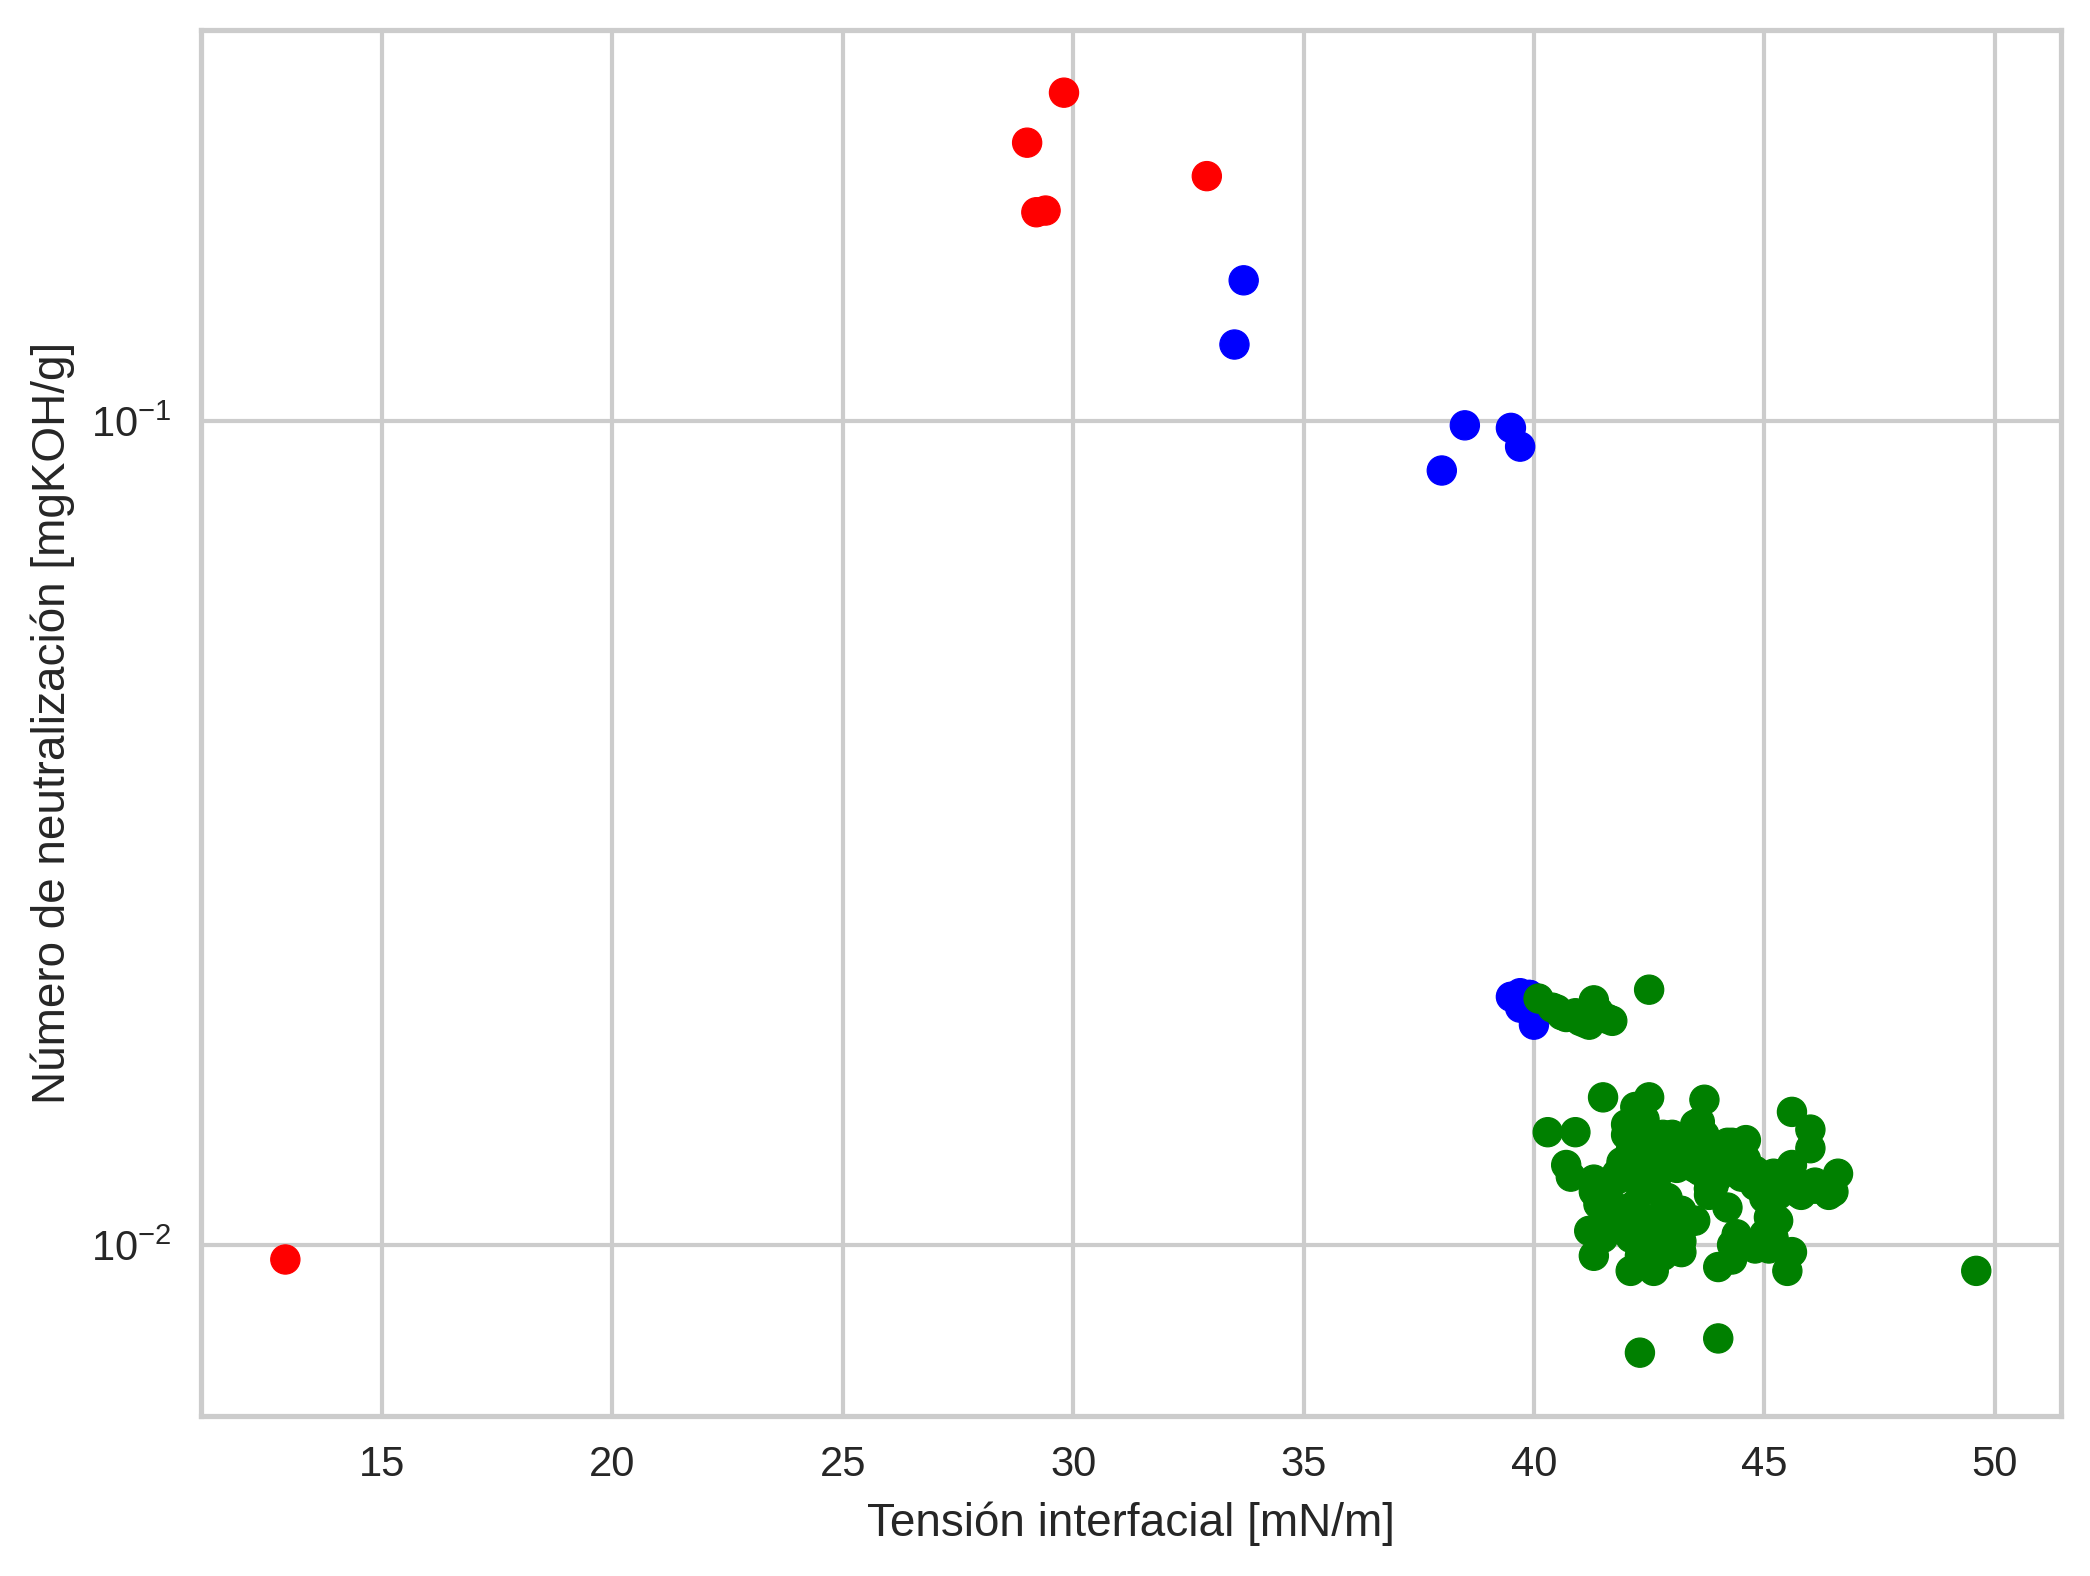

In [ ]:
def clasificar_estado_f1(ti, nn):
    if ti > 40 and nn < 0.1:
        return 'green'
    elif 35 <= ti <= 40 or 0.1 <= nn <= 0.15:
        return 'blue'
    else:
        return 'red'

colores_f1 = [clasificar_estado_f1(ti, nn) for ti, nn in zip(df['Tensión interfacial'], df['Número ácido'])]

plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(df['Tensión interfacial'], df['Número ácido'], c=colores_f1, marker='o')
plt.xlabel('Tensión interfacial [mN/m]')
plt.ylabel('Número de neutralización [mgKOH/g]')
plt.yscale('log')
plt.grid(True)

plt.savefig('figura1_ti_vs_nn.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
from google.colab import files
files.download('figura1_ti_vs_nn.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

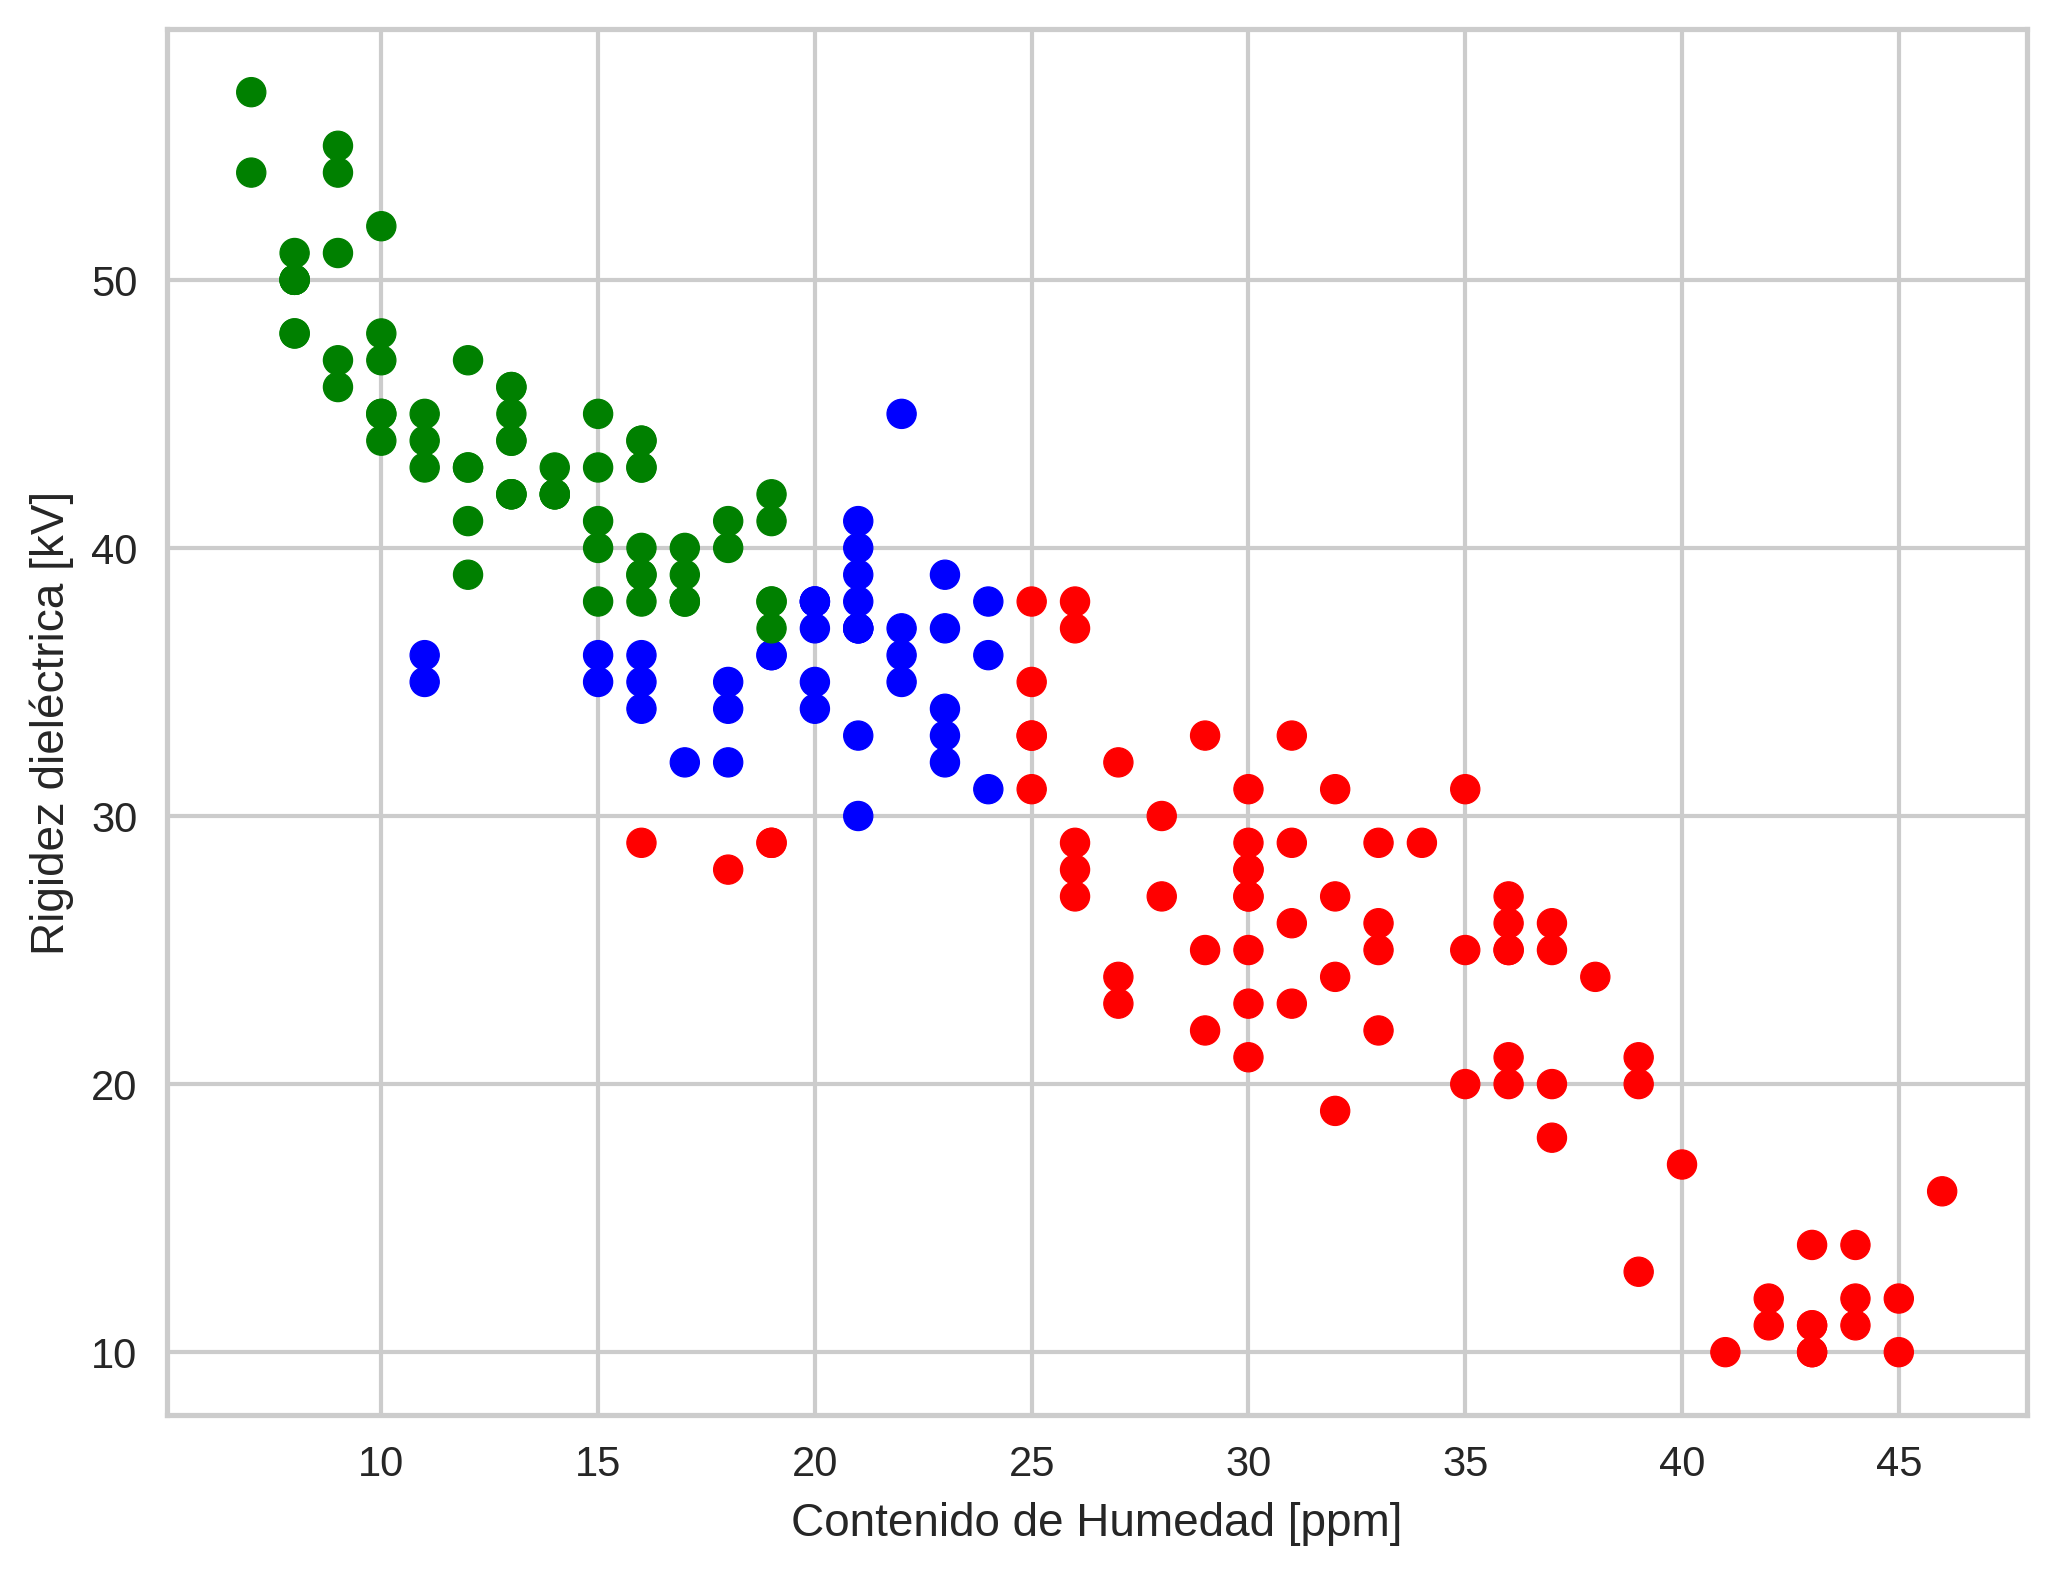

In [ ]:
def clasificar_estado_f2(h2o, rigidez):
    if h2o < 20 and rigidez >= 37:
        return 'green'
    elif h2o < 25 and 30 <= rigidez < 60:
        return 'blue'
    else:
        return 'red'

colores_f2 = [clasificar_estado_f2(h, r) for h, r in zip(df['Contenido de Humedad'], df['Rigidez dieléctrica '])]

plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(df['Contenido de Humedad'], df['Rigidez dieléctrica '], c=colores_f2, marker='o')
plt.xlabel('Contenido de Humedad [ppm]')
plt.ylabel('Rigidez dieléctrica [kV]')
plt.grid(True)
plt.savefig('figura2_IFT_vs_H2O.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from google.colab import files
files.download('figura2_IFT_vs_H2O.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_imputed)

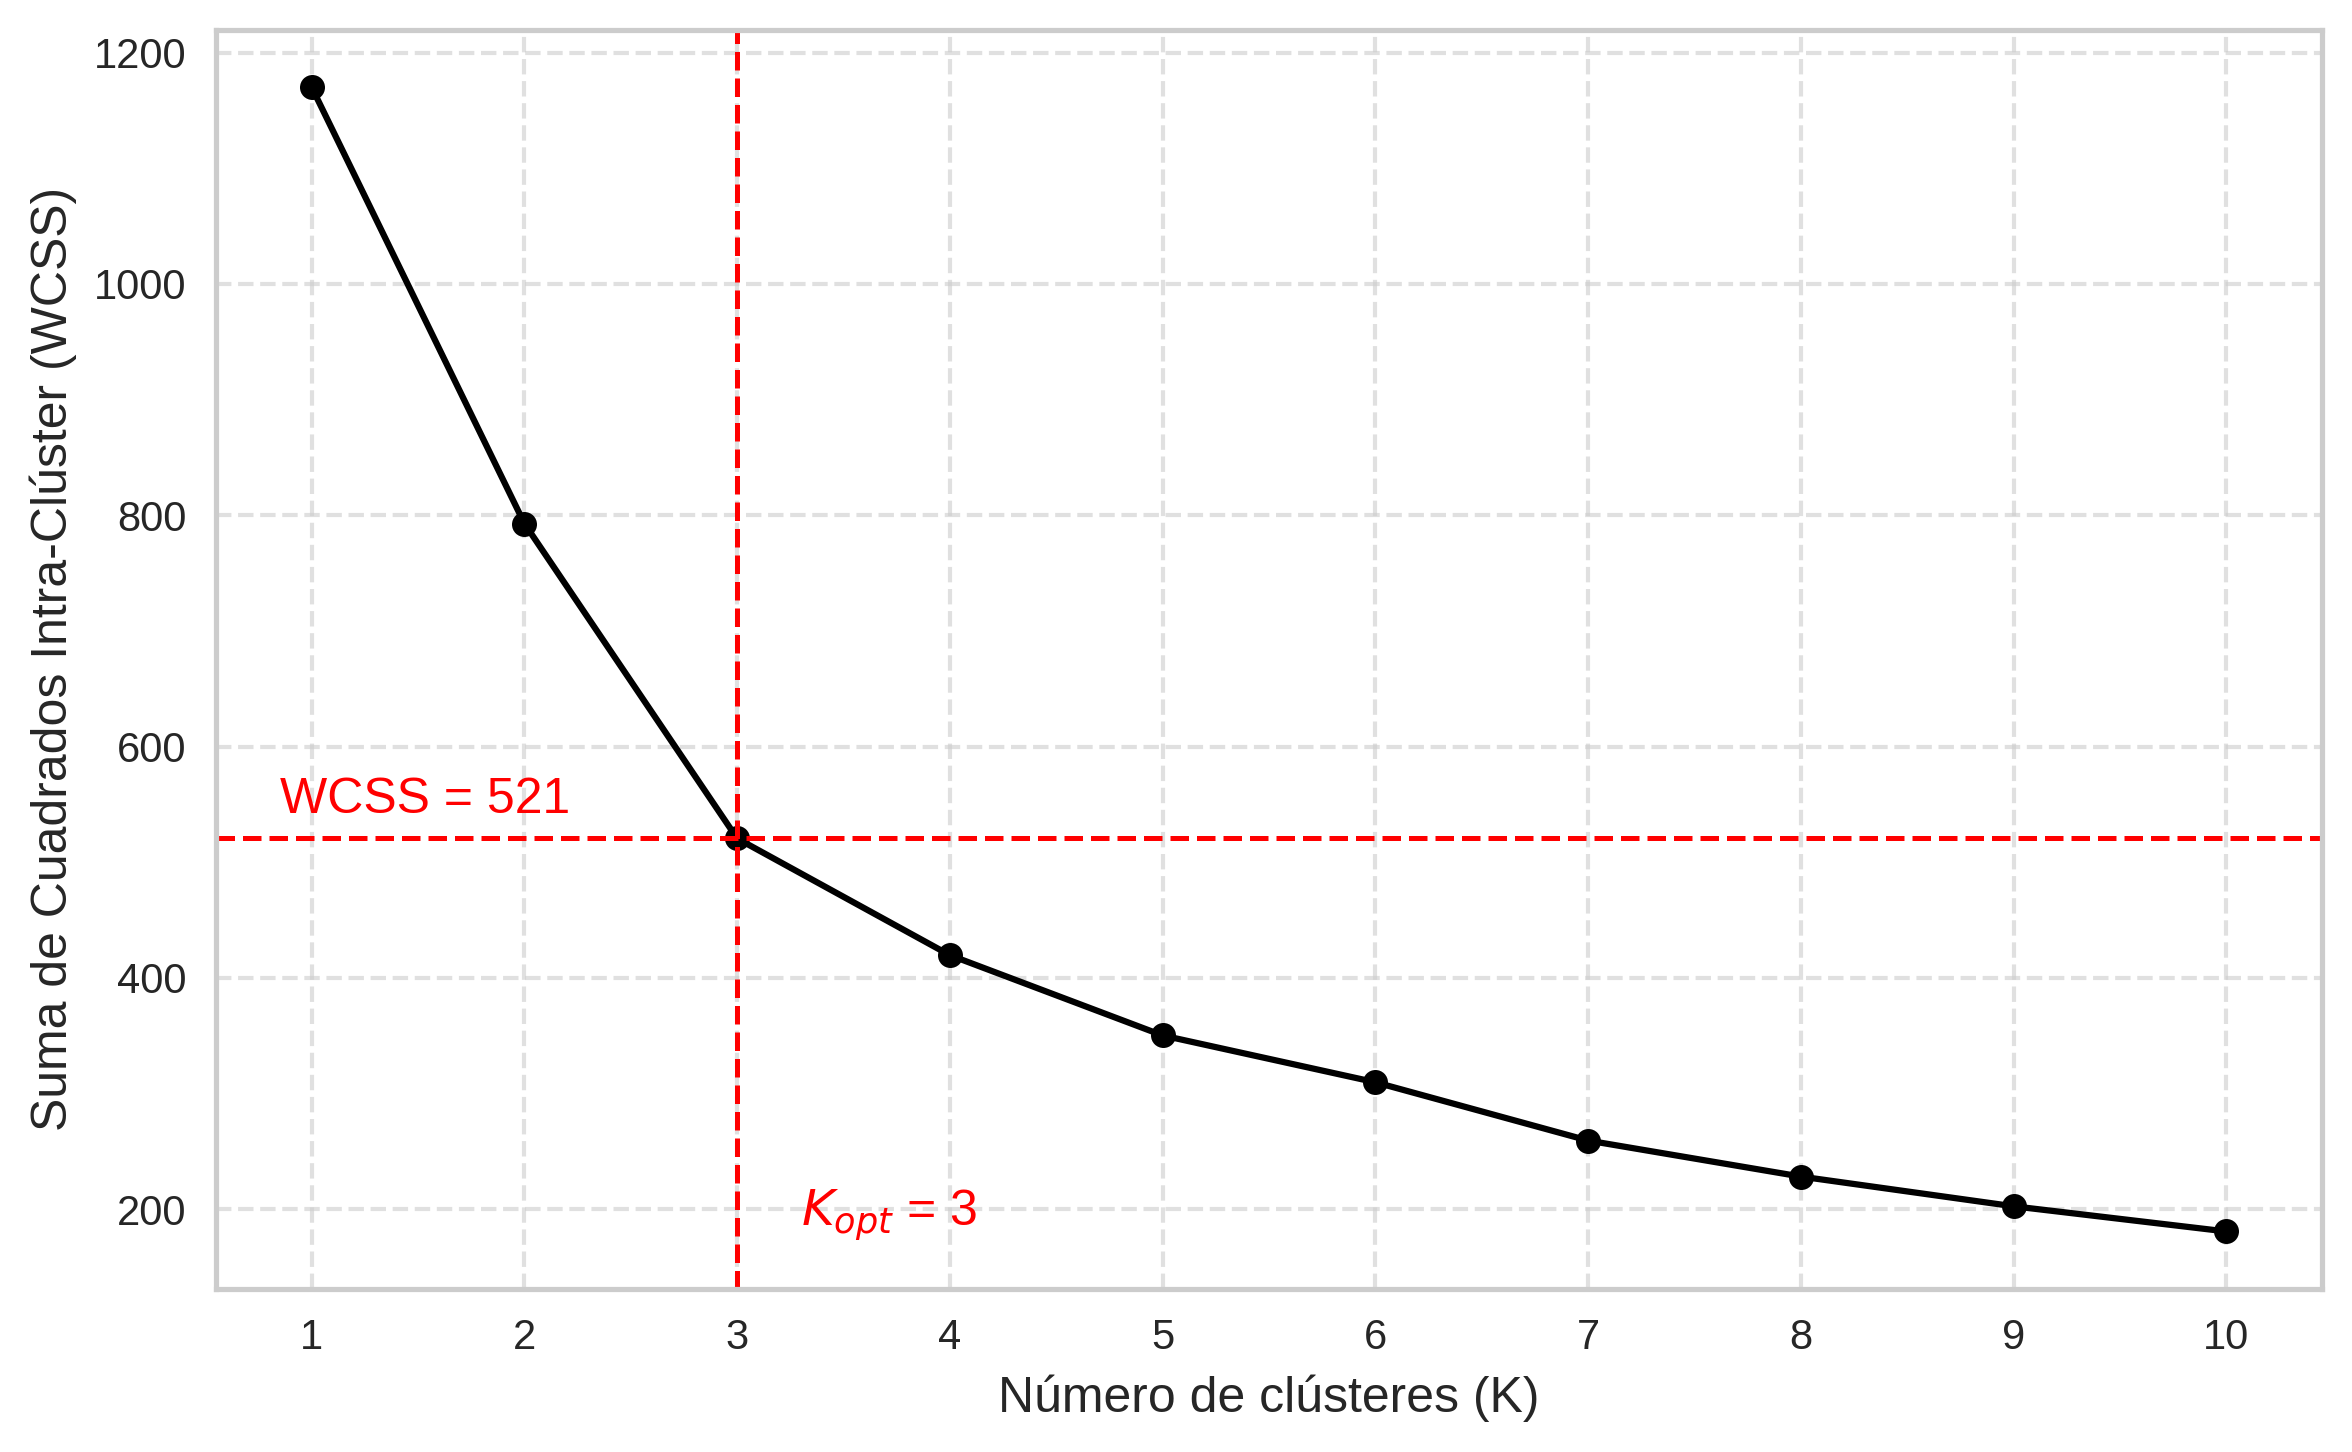

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)
for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Número óptimo de clústeres estimado visualmente (modifica si cambia)
K_optimo = 3
WCSS_optimo = wcss[K_optimo - 1]

# --- Gráfico refinado con anotaciones ---
plt.figure(figsize=(8, 5),dpi=300)
plt.plot(K_range, wcss, marker='o', linestyle='-', color='black', linewidth=1.5, markersize=6)

# Línea vertical y horizontal roja punteada
plt.axvline(x=K_optimo, color='red', linestyle='--', linewidth=1.2)
plt.axhline(y=WCSS_optimo, color='red', linestyle='--', linewidth=1.2)

# Etiquetas de texto
plt.text(K_optimo + 0.3, plt.ylim()[0] + 0.05*(plt.ylim()[1] - plt.ylim()[0]),
         f'$K_{{opt}}$ = {K_optimo}', color='red', fontsize=12)
plt.text(plt.xlim()[0] + 0.3, WCSS_optimo + 0.02*(plt.ylim()[1] - plt.ylim()[0]),
         f'WCSS = {WCSS_optimo:.0f}', color='red', fontsize=12)

# Ejes y estilo
plt.xticks(K_range, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Número de clústeres (K)', fontsize=12)
plt.ylabel('Suma de Cuadrados Intra-Clúster (WCSS)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('figura3_WCSS.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
from google.colab import files
files.download('figura3_WCSS.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Silhouette Score: 0.38013340457502215


/tmp/ipython-input-9-811331858.py:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


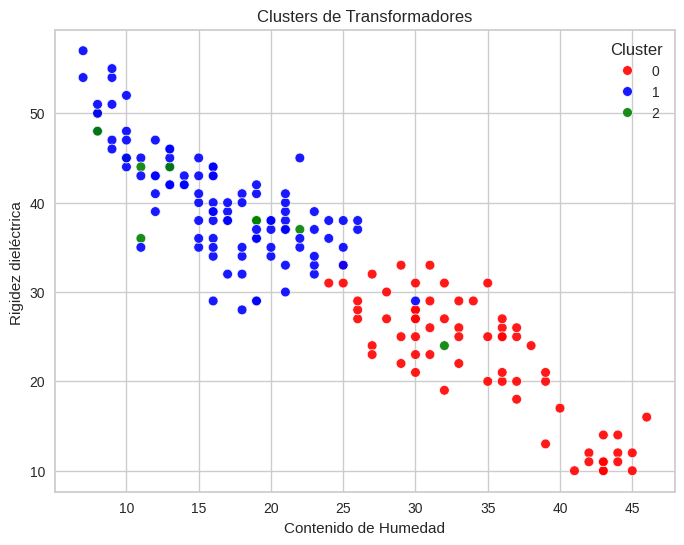

In [ ]:
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
cluster_labels = pd.Series(kmeans.fit_predict(X_scaled), index=df.index)
df["Cluster"] = cluster_labels
silhouette_avg = silhouette_score(X_scaled, df.loc[df.index, "Cluster"])
print(f"Silhouette Score: {silhouette_avg}")
colors = ["red", "blue", "green", "orange", "purple", "cyan", "magenta", "yellow", "lime", "black"]
colores_personalizados = ["red", "blue", "green", "orange", "purple"]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Contenido de Humedad"],
    y=df["Rigidez dieléctrica "],
    hue=df["Cluster"],
    palette=colores_personalizados,
    alpha=0.9,
    s=50
)
plt.xlabel("Contenido de Humedad")
plt.ylabel("Rigidez dieléctrica ")
plt.title("Clusters de Transformadores")
plt.legend(title="Cluster")
plt.show()

In [ ]:
silhouette_avg = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score (K-means): {silhouette_avg}")


Silhouette Score (K-means): 0.38013340457502215


In [ ]:
df.head(15)

,Tensión interfacial,Número ácido,Rigidez dieléctrica,Contenido de Humedad,Furanos,Indice de Calidad,Cluster
0,42.5,0.0204,50.0,8.0,10.0,2083.33,1
1,40.8,0.0121,51.0,9.0,10.0,3371.90,1
2,43.8,0.0115,44.0,16.0,25.0,3808.70,1
3,43.4,0.0126,31.0,24.0,38.0,3444.44,0
4,45.0,0.0103,34.0,18.0,20.0,4368.93,1
5,43.0,0.0125,38.0,16.0,34.0,3440.00,1
6,46.0,0.0131,16.0,46.0,80.0,3511.45,0
7,41.5,0.0151,46.0,13.0,26.0,2748.34,1
8,39.7,0.0194,40.0,16.0,28.0,2046.39,1
9,40.3,0.0137,33.0,25.0,48.0,2941.61,0


In [ ]:
df.head(11)

,Tensión interfacial,Número ácido,Rigidez dieléctrica,Contenido de Humedad,Furanos,Indice de Calidad,Cluster
0,42.5,0.0204,50.0,8.0,10.0,2083.33,1
1,40.8,0.0121,51.0,9.0,10.0,3371.90,1
2,43.8,0.0115,44.0,16.0,25.0,3808.70,1
3,43.4,0.0126,31.0,24.0,38.0,3444.44,0
4,45.0,0.0103,34.0,18.0,20.0,4368.93,1
5,43.0,0.0125,38.0,16.0,34.0,3440.00,1
6,46.0,0.0131,16.0,46.0,80.0,3511.45,0
7,41.5,0.0151,46.0,13.0,26.0,2748.34,1
8,39.7,0.0194,40.0,16.0,28.0,2046.39,1
9,40.3,0.0137,33.0,25.0,48.0,2941.61,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.base import clone
%matplotlib inline

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [ ]:
df.columns = df.columns.str.strip()
X = df[[
    'Tensión interfacial',
    'Número ácido',
    'Rigidez dieléctrica',
    'Contenido de Humedad',
    'Furanos',
    'Indice de Calidad'
]]
y = df['Cluster']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[01:04:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

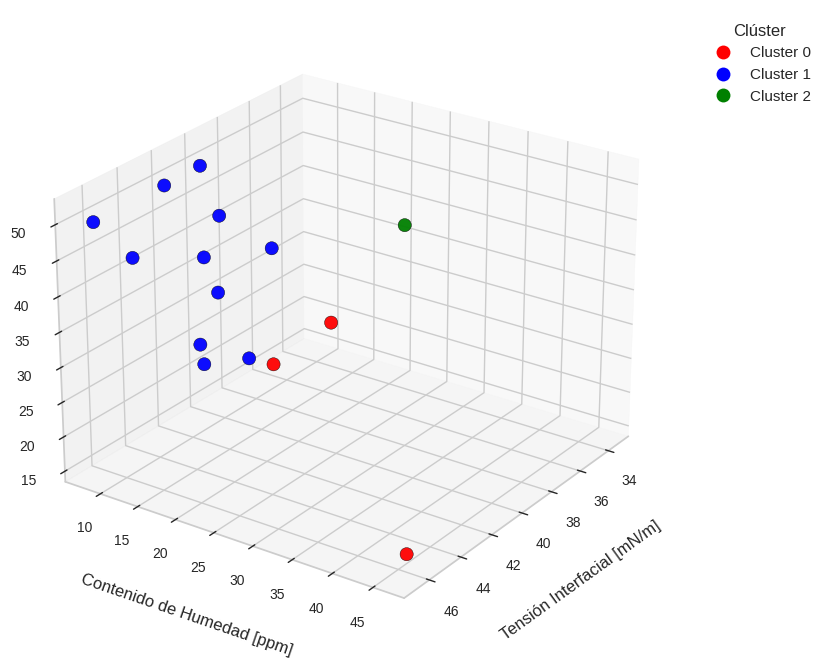

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Filtrar primeros 15 transformadores
df_15 = df.head(15)

# Variables para ejes
x = df_15['Tensión interfacial']
y = df_15['Contenido de Humedad']
z = df_15['Rigidez dieléctrica']
clusters = df_15['Cluster']

# Colores por clúster
colores_personalizados = ["red", "blue", "green", "orange", "purple"]
colores = [colores_personalizados[c] for c in clusters]

# Crear figura
fig = plt.figure(figsize=(10, 8))  # Más alto para evitar cortes
ax = fig.add_subplot(111, projection='3d', facecolor='white')

# Dibujar puntos
ax.scatter(x, y, z, c=colores, s=90, edgecolor='black', alpha=0.95)

# Etiquetas con más separación
ax.set_xlabel('Tensión Interfacial [mN/m]', fontsize=12, labelpad=20)
ax.set_ylabel('Contenido de Humedad [ppm]', fontsize=12, labelpad=20)
ax.set_zlabel('Rigidez Dieléctrica [kV]', fontsize=12, labelpad=15)


# Ajuste de ángulo de vista
ax.view_init(elev=25, azim=35)

# Leyenda personalizada
unique_clusters = sorted(df_15['Cluster'].unique())
legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label=f'Cluster {c}', markerfacecolor=colores_personalizados[c],
           markersize=10, markeredgecolor='black')
    for c in unique_clusters
]
# Posicionamiento fuera del gráfico
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=11, title="Clúster")

# Ajustar márgenes para que no se corte nada
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.8, top=0.9, bottom=0.1)








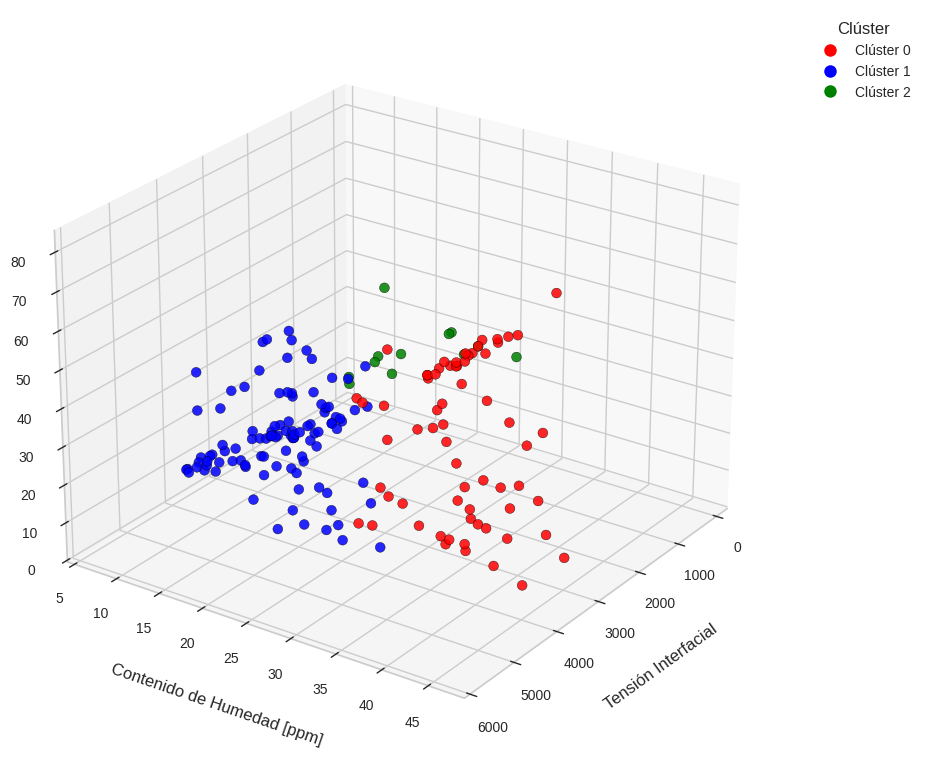

In [ ]:
# === Figura 8: Gráfico 3D completo con 180 transformadores ===
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

# Variables seleccionadas
x = df['Indice de Calidad']
y = df['Contenido de Humedad']
z = df['Furanos']
clusters = df['Cluster']

# Colores personalizados según clúster
colores_personalizados = ["red", "blue", "green"]
colores = [colores_personalizados[c] for c in clusters]

# Crear figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')

# Graficar puntos
ax.scatter(x, y, z, c=colores, s=50, edgecolor='black', alpha=0.85)

# Etiquetas
ax.set_xlabel('Tensión Interfacial', fontsize=12,labelpad=20)
ax.set_ylabel('Contenido de Humedad [ppm]', fontsize=12,labelpad=20)
ax.set_zlabel('Furanos [ppb]', fontsize=12,labelpad=20)

# Leyenda
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'Clúster {c}',
           markerfacecolor=colores_personalizados[c], markeredgecolor='black', markersize=9)
    for c in sorted(df['Cluster'].unique())
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10, title="Clúster")

# Ajuste visual
ax.view_init(elev=25, azim=35)
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.8)

# Guardar imagen
plt.savefig("fig8_3d_transformadores.png", dpi=300, bbox_inches='tight')
plt.show()




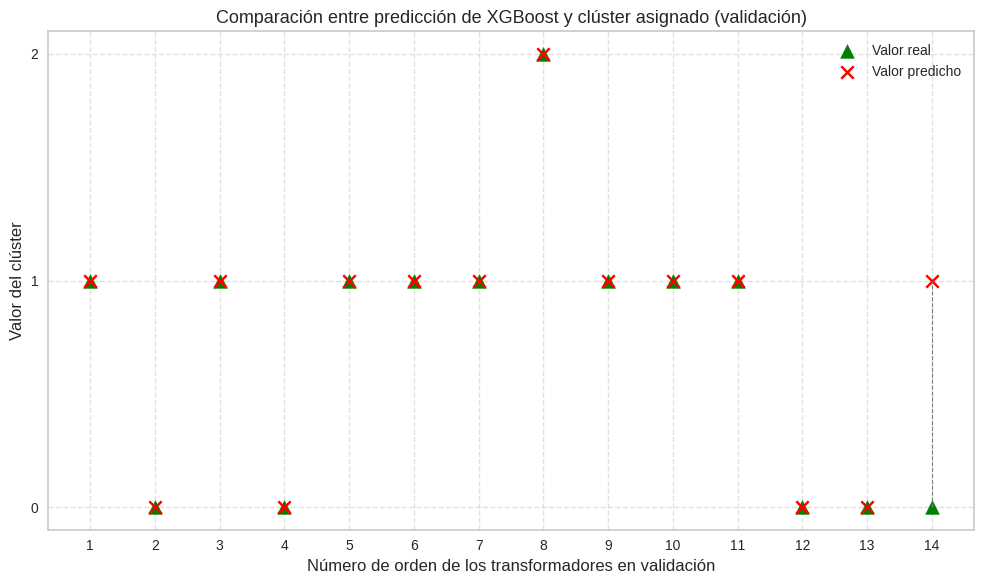

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Tomar una muestra de validación: los primeros 14 del conjunto de prueba
X_val = X_test[:14]
y_val_real = y_test[:14]
y_val_pred = model.predict(X_val)

indices = np.arange(1, len(X_val) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(indices, y_val_real, color='green', marker='^', s=100, label='Valor real')
plt.scatter(indices, y_val_pred, color='red', marker='x', s=80, label='Valor predicho')

# Líneas punteadas entre real y predicho
for i in range(len(indices)):
    plt.plot([indices[i], indices[i]], [y_val_real[i], y_val_pred[i]], color='gray', linestyle='--', linewidth=0.8)

plt.xlabel('Número de orden de los transformadores en validación', fontsize=12)
plt.ylabel('Valor del clúster', fontsize=12)
plt.title('Comparación entre predicción de XGBoost y clúster asignado (validación)', fontsize=13)
plt.xticks(indices)
plt.yticks(sorted(np.unique(np.concatenate((y_val_real, y_val_pred)))))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

nombre_archivo = "figura9_validacion_xgboost.png"
plt.savefig(nombre_archivo, dpi=300, bbox_inches='tight')
plt.show()

# Descargar automáticamente la imagen (solo funciona en Colab)
files.download(nombre_archivo)


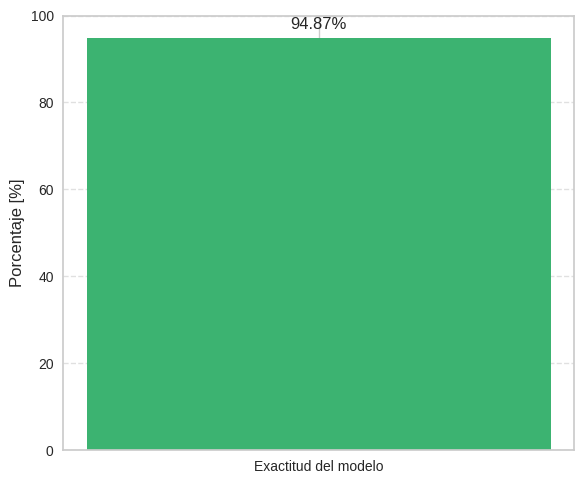

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import files

# Calcular exactitud en el conjunto de validación
accuracy = accuracy_score(y_test, model.predict(X_test)) * 100  # en porcentaje

# Crear gráfica de barras para mostrar la métrica
plt.figure(figsize=(6, 5))
plt.bar(['Exactitud del modelo'], [accuracy], color='mediumseagreen')
plt.ylim(0, 100)
plt.ylabel('Porcentaje [%]', fontsize=12)
plt.text(0, accuracy + 2, f'{accuracy:.2f}%', ha='center', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Guardar y descargar la imagen
nombre_fig10 = "figura10_exactitud_xgboost.png"
plt.savefig(nombre_fig10, dpi=300, bbox_inches='tight')
plt.show()
files.download(nombre_fig10)


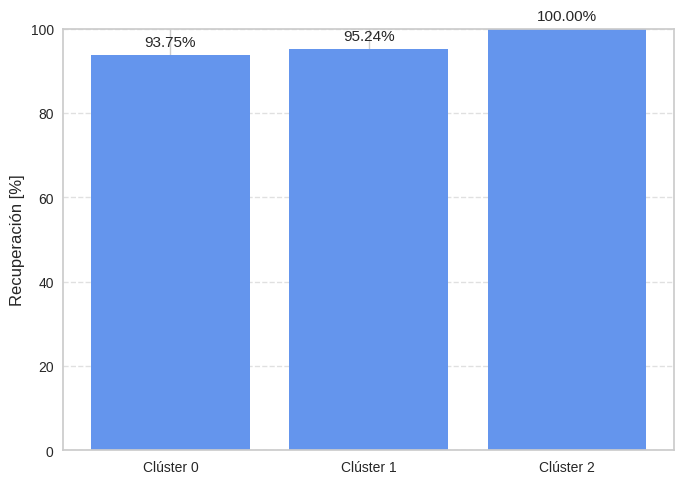

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Obtener etiquetas verdaderas y predichas
y_true = y_test
y_pred = model.predict(X_test)

# Calcular recall por clase
recalls = recall_score(y_true, y_pred, average=None) * 100  # en porcentaje
clases = np.unique(y_true)

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
plt.bar([f'Clúster {c}' for c in clases], recalls, color='cornflowerblue')
plt.ylim(0, 100)
plt.ylabel('Recuperación [%]', fontsize=12)


# Mostrar valores numéricos encima de cada barra
for i, valor in enumerate(recalls):
    plt.text(i, valor + 2, f'{valor:.2f}%', ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Guardar y descargar
nombre_fig11 = "figura11_recall_xgboost.png"
plt.savefig(nombre_fig11, dpi=300, bbox_inches='tight')
plt.show()
files.download(nombre_fig11)


<Figure size 2000x1000 with 0 Axes>

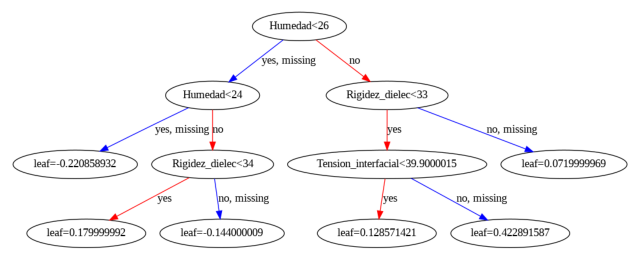

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
from google.colab import files

# Paso 1: booster directo del modelo
booster = model_ascii.get_booster()

# Paso 2: visualización básica sin parámetros conflictivos
plt.figure(figsize=(20, 10))
plot_tree(booster, num_trees=0)
plt.savefig("arbol_xgboost.png", dpi=300, bbox_inches='tight')
plt.show()

# Paso 3: descarga (en Colab)
files.download("arbol_xgboost.png")




